In [1]:
from detector import CornerDetector
import cv2
import matplotlib.pyplot as plt

In [7]:
detector = CornerDetector('../../../best_model.pt')
detector.device_info()

Model summary: 129 layers, 3,012,603 parameters, 0 gradients, 8.2 GFLOPs
Is GPU available?: True
GPU count: 1
Device name: NVIDIA GeForce GTX 1070


In [6]:
img = cv2.imread('cccd/img984.jpg')
plt.imshow(img[:,:,::-1])

FileNotFoundError: [Errno 2] No such file or directory: 'cccd/img984.jpg'

In [4]:
results = detector.predict('../../../datasets/500.jpg')


image 1/1 c:\Users\admin\Desktop\CV_Project\src\modules\corner-detector\..\..\..\datasets\500.jpg: 640x640 1 id, 1 full_name, 1 date_of_birth, 1 sex, 1 nationality, 1 place_of_origin, 2 place_of_residences, 1 date_of_expiry, 1 qr_code, 17.3ms
Speed: 4.1ms preprocess, 17.3ms inference, 157.7ms postprocess per image at shape (1, 3, 640, 640)


In [5]:
len(results)

1

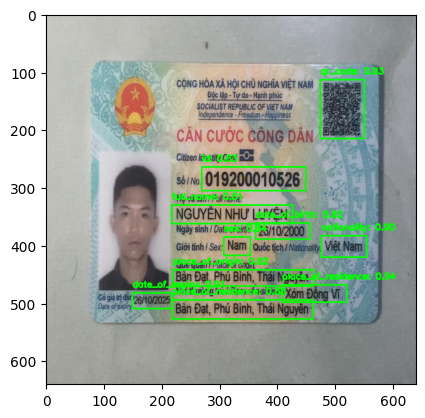

In [6]:
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Lấy toạ độ (x1, y1, x2, y2)
        confidence = box.conf[0].item()  # Lấy độ chính xác
        class_id = int(box.cls[0])  # Lấy ID của class
        label = f"{detector.get_model().names[class_id]}: {confidence:.2f}"  # Tạo label

        # Vẽ bounding box lên ảnh
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Màu xanh lá, độ dày 2px
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.imshow(img[:,:,::-1])

In [11]:
detector.get_model().names

{0: 'id',
 1: 'full_name',
 2: 'date_of_birth',
 3: 'sex',
 4: 'nationality',
 5: 'place_of_origin',
 6: 'place_of_residence',
 7: 'date_of_expiry',
 8: 'qr_code'}

In [10]:

# Lấy danh sách bounding boxes
h, w, _ = img.shape
for r in results:
    for box in r.boxes:
        class_id = int(box.cls)  # ID class
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        x_center = (x1 + x2) / 2 / w
        y_center = (y1 + y2) / 2 / h
        width = (x2 - x1) / w
        height = (y2 - y1) / h
        print(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")



6 0.726167 0.755576 0.174503 0.046430

8 0.801221 0.256867 0.118811 0.158200

2 0.639392 0.586845 0.147118 0.043846

7 0.286927 0.775287 0.107348 0.043045

4 0.806225 0.627772 0.121866 0.057340

6 0.531093 0.798778 0.379506 0.050774

3 0.516212 0.627383 0.071304 0.051398

0 0.561476 0.445416 0.281517 0.065013

5 0.533599 0.713399 0.381252 0.044625

1 0.503374 0.540716 0.325925 0.049837



In [12]:
import os

# Thư mục ảnh và nhãn
dataset_dir = "./dataset"
image_dir = os.path.join(dataset_dir, "train/images")  # Thư mục chứa ảnh train
label_dir = os.path.join(dataset_dir, "train/labels")  # Thư mục chứa nhãn

In [13]:
os.makedirs(label_dir, exist_ok=True)

In [15]:

image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith(".jpg")]

for img_path in image_paths:
    results = detector.predict(img_path)
    img_name = os.path.basename(img_path).replace(".jpg", ".txt")
    label_path = os.path.join(label_dir, img_name)

    img = cv2.imread(img_path)
    h, w, _ = img.shape  # Kích thước ảnh

    with open(label_path, "w") as f:
        for r in results:
            for box in r.boxes:
                confidence = box.conf.item()  # Độ tin cậy
                class_id = int(box.cls)  # ID class
                x1, y1, x2, y2 = box.xyxy[0].tolist()

                # Chuyển đổi sang YOLO format
                x_center = (x1 + x2) / 2 / w
                y_center = (y1 + y2) / 2 / h
                width = (x2 - x1) / w
                height = (y2 - y1) / h

                f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

    print(f"Saved label: {label_path}")



image 1/1 c:\Users\admin\Desktop\CV_Project\src\modules\corner-detector\dataset\train\images\104_jpg.rf.ff6f5b49d983a116ee512cd13adf88cd.jpg: 640x640 1 id, 1 full_name, 1 date_of_birth, 1 sex, 2 nationalitys, 2 place_of_origins, 1 place_of_residence, 1 date_of_expiry, 1 qr_code, 31.7ms
Speed: 6.2ms preprocess, 31.7ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)
Saved label: ./dataset\train/labels\104_jpg.rf.ff6f5b49d983a116ee512cd13adf88cd.txt

image 1/1 c:\Users\admin\Desktop\CV_Project\src\modules\corner-detector\dataset\train\images\105_jpg.rf.a6f05d193df0bad4648ea0368a133c29.jpg: 640x640 1 id, 1 full_name, 1 date_of_birth, 1 sex, 1 nationality, 1 place_of_origin, 2 place_of_residences, 1 date_of_expiry, 1 qr_code, 32.2ms
Speed: 5.5ms preprocess, 32.2ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)
Saved label: ./dataset\train/labels\105_jpg.rf.a6f05d193df0bad4648ea0368a133c29.txt

image 1/1 c:\Users\admin\Desktop\CV_Project\src\modules\corner